In [1]:
%matplotlib inline
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd
from time import time
import networkx as nx
import community
from IPython.core.display import display


def draw_distortion(max_K):
    data = np.loadtxt('./emb/facebook.emd')
    y = np.ravel(data[:, 0:1].astype(np.int64))
    X = data[:, 1:]

    distortions = []
    y_pred_list = []

    for i in range(1, max_K + 1):
        km = KMeans(n_clusters=i,random_state=810,n_jobs=-1)
        y_pred_list.append(km.fit_predict(X))
        distortions.append(km.inertia_)

    plt.plot(range(1,max_K + 1), distortions, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Distortion')
    plt.tight_layout()
    plt.show()

    
def K_means_clustering(K):
    start = time()
    
    data = np.loadtxt('./emb/facebook.emd')
    y = np.ravel(data[:, 0:1].astype(np.int64))
    X = data[:, 1:]
    km = KMeans(n_clusters=K,random_state=810,n_jobs=-1)

    print("node2vec_time: {}".format(time() - start))

    pd.set_option('display.max_rows', 5000)
    result = pd.DataFrame(np.vstack([y, km.fit_predict(X)]).T, columns=['node_id', 'node2vec_cluster'])
    result.sort_values('node_id', inplace=True)
    result = result.reset_index(drop=True)

    # cluster_idの変換を行う
    cluster_id_unique = result["node2vec_cluster"].unique()
    conversion = {cluster_id_unique[i]: i for i in range(len(cluster_id_unique))}
    result["node2vec_cluster"] = result["node2vec_cluster"].replace(conversion)

    return result


def networkx_clustering():
    start = time()
    G = nx.read_edgelist("./graph/facebook_combined.txt")
    partition = community.best_partition(G, random_state=810) # Girvan-Newmanアルゴリズムというモジュラリティを最大化し，かつ計算量が少なくなるアルゴリズム
    print("Modularity {}".format(community.modularity(partition, G)))
    communities = [partition.get(node) for node in G.nodes()]
    print("Number of communities {}".format(max(communities)))
    print("community_detection_time: {}".format(time() - start))
    return communities


node_result = K_means_clustering(15)
network_result = networkx_clustering()
result = pd.concat([node_result, pd.DataFrame(network_result, columns=["network_cluster"])], axis=1)
display(result["node2vec_cluster"].value_counts())
display(result["network_cluster"].value_counts())

node2vec_time: 1.1105952262878418
Modularity 0.8349714021924082
Number of communities 15
community_detection_time: 14.377016544342041


2     554
9     547
0     343
11    334
5     314
4     266
12    249
1     241
13    237
14    226
8     205
3     199
10    170
6      94
7      60
Name: node2vec_cluster, dtype: int64

7     548
4     535
2     435
1     430
3     423
0     350
5     325
9     237
13    226
12    206
6     128
8      73
11     60
10     25
15     19
14     19
Name: network_cluster, dtype: int64

In [2]:
display(result)

,node_id,node2vec_cluster,network_cluster
0,0,0,0
1,1,0,0
2,2,0,0
3,3,0,0
4,4,0,0
5,5,0,0
6,6,0,0
7,7,0,0
8,8,0,0
9,9,0,0


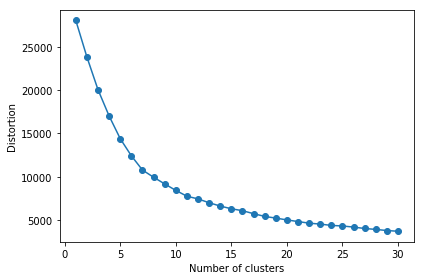

In [3]:
draw_distortion(30)

In [4]:
G = nx.read_edgelist("./graph/facebook_combined.txt")
spring_pos = nx.spring_layout(G)

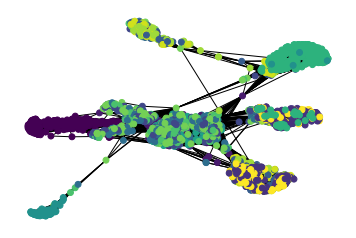

In [5]:
plt.axis("off")
nx.draw_networkx(G, pos=spring_pos, cmpa=plt.get_cmap("jet"), node_color=result["node2vec_cluster"], node_size=35, with_labels=False)
#plt.savefig("node2vec_result.png")

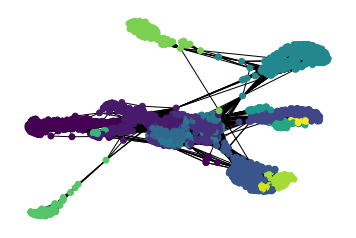

In [6]:
plt.axis("off")
nx.draw_networkx(G, pos=spring_pos, cmpa=plt.get_cmap("jet"), node_color=result["network_cluster"], node_size=35, with_labels=False)
#plt.savefig("network_result.png")